<a href="https://colab.research.google.com/github/leighd2008/TF-class-colab-notebooks/blob/main/02_Neural_network_classification_with_TensorFlow_Exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 02. Neural network classification with TensorFlow Exercises
([solution](https://colab.research.google.com/github/ashikshafi08/Learning_Tensorflow/blob/main/Exercise%20Solutions/%F0%9F%9B%A0%2002_neural_network_classification_in_tensorflow.ipynb))

## Questionaire

1. Create a classification data set using Scikit-learn's [`make_moons()`](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_moons.html) function, visualize it and the build a model to fit it at over 85% accuracy.

2. Create a function (or write code) to visualize multiple image predictions for the fashion MNIST at the same time. Plot at least three different images and their prediction labels at the same time. Hint: see the [classification tutorial in the TensorFlow documentation](https://www.tensorflow.org/tutorials/keras/classification) for ideas.

3. Recreate [TensorFlow](https://www.tensorflow.org/api_docs/python/tf/keras/activations/softmax)'s [softmax activation](https://en.wikipedia.org/wiki/Softmax_function) function in your own code. Make sure it can accept a tensor and return that tensor after having the softmax function applied to it.

4. Train a model to get 88%+ accuracy on the fashion MNIST test set. Plot a confusion matrix to see the results after.

5. Make a function to show an image of a certain class of the fashion MNIST dataset and make a prediction on it. For example, plot 3 images of the T-shirt class with their predictions.

In [ ]:
# Import the tools we need
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## 1. Create a classification data set using Scikit-learn's make_moons() function, visualize it and the build a model to fit it at over 85% accuracy.

In [ ]:
# Import make_moons function from Scikit learn
from sklearn.datasets import make_moons

# Make 3K samples
n_samples = 1000

# Create circles
X, y = make_moons(n_samples = n_samples,
                  random_state=42)

# Check the state of X and y
print(X.shape, y.shape)

# Create a dataframe
make_moons_df = pd.DataFrame({'col_1': X[:, 0],
                             'col_2': X[:, 1],
                             'label': y})

make_moons_df.head()

(1000, 2) (1000,)


,col_1,col_2,label
0,0.008727,0.368174,1
1,0.921384,-0.496905,1
2,0.940226,-0.498212,1
3,0.465875,-0.345406,1
4,-0.850412,0.526117,0


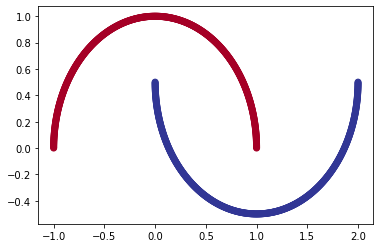

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu);

In [ ]:
# split dataset into train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=42)
# check the shapes
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((800, 2), (200, 2), (800,), (200,))

In [ ]:
# set random seed
tf.random.set_seed(42)

# create model
model_1 = tf.keras.Sequential([
  tf.keras.layers.Dense(32, activation='relu'),
  tf.keras.layers.Dense(10, activation='relu'),
  tf.keras.layers.Dense(1, activation='sigmoid')
])

# compile model
model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

# fit model
model_1.fit(X_train, y_train, epochs=15)

Epoch 1/15
25/25 [==============================] - 1s 3ms/step - loss: 0.5878 - accuracy: 0.5500
Epoch 2/15
25/25 [==============================] - 0s 4ms/step - loss: 0.5328 - accuracy: 0.7788
Epoch 3/15
25/25 [==============================] - 0s 3ms/step - loss: 0.4956 - accuracy: 0.8512
Epoch 4/15
25/25 [==============================] - 0s 6ms/step - loss: 0.4688 - accuracy: 0.8650
Epoch 5/15
25/25 [==============================] - 0s 2ms/step - loss: 0.4425 - accuracy: 0.8712
Epoch 6/15
25/25 [==============================] - 0s 3ms/step - loss: 0.4050 - accuracy: 0.8750
Epoch 7/15
25/25 [==============================] - 0s 5ms/step - loss: 0.3599 - accuracy: 0.8813
Epoch 8/15
25/25 [==============================] - 0s 2ms/step - loss: 0.3209 - accuracy: 0.8838
Epoch 9/15
25/25 [==============================] - 0s 3ms/step - loss: 0.2910 - accuracy: 0.8888
Epoch 10/15
25/25 [==============================] - 0s 3ms/step - loss: 0.2655 - accuracy: 0.8963
Epoch 11/15
25/25 [

In [ ]:
# Create function to visualize how the model is doing
def Plot_decision_boundary(model, X, y):
  """
  Plots the decision boundary for the model
  """

  # Define the axis boundaries of the plot and create a meshgrid
  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))
  
  # Create X value (we're going to make predictions on these)
  x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2D arrays together

  # Make predictions
  y_pred = model.predict(x_in)

  # Check for multi-class
  if len(y_pred[0]) > 1:
    print("doing multiclass classification")
    # reshape prediction to get them ready for plotting
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("doing binary classification")
    y_pred = np.round(y_pred).reshape(xx.shape)
  
  # Plot the decision boundary
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:,0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

doing binary classification


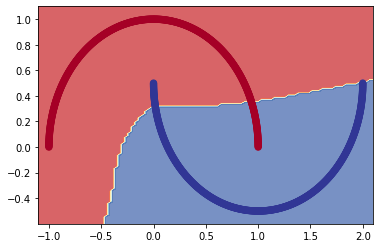

In [ ]:
# Look at how well the model makes decisions
Plot_decision_boundary(model=model_1,
                       X=X,
                       y=y)

## 2. Create a function (or write code) to visualize multiple image predictions for the fashion MNIST at the same time. Plot at least three different images and their prediction labels at the same time. Hint: see the classification tutorial in the TensorFlow documentation for ideas.

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.8.0


In [ ]:
# import the Fashion MNIST dataset
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [ ]:
# what does the data look like
train_images.shape, train_labels.shape, test_images.shape, test_labels.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

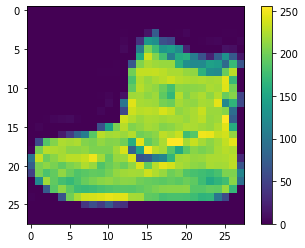

In [ ]:
# What do the images look like
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

**Neural networks like the data to be between 0 and 1. Our image pixel values range from 0 to 255. We will "normalized" these values by dividing by 255. This will make the data between 0 and 1.**

It is important that the training and testing datasets are preprocessed the same way.

In [ ]:
train_images = train_images / 255
test_images = test_images / 255

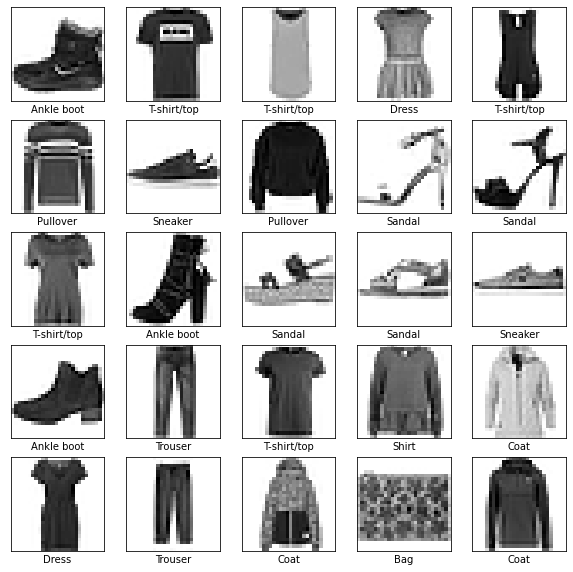

In [ ]:
# visualize, visualize, visualize
# print the first 25 images from the training set and display the class name
plt.figure(figsize=(10, 10))
for i in range(25):
  plt.subplot(5, 5, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i], cmap=plt.cm.binary)
  plt.xlabel(class_names[train_labels[i]])
plt.show()


In [ ]:
from matplotlib.cbook import flatten
# Build the model
tf.random.set_seed(42)

# Create model
model_1 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)), # flatten the images from 2D to 1D
  tf.keras.layers.Dense(4, activation='relu'),
  tf.keras.layers.Dense(4, activation='relu'),
  tf.keras.layers.Dense(10, activation=tf.keras.activations.softmax) # 10 class_names so 10 nodes
])

# Compile model
model_1.compile(loss=tf.keras.losses.CategoricalCrossentropy(), # must one hot encode labels to use this
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

# Fit model 
model_1.fit(train_images, tf.one_hot(train_labels, depth=10), epochs=25,
            validation_data=(test_images, tf.one_hot(test_labels, depth=10)))


Epoch 1/25
1875/1875 [==============================] - 10s 5ms/step - loss: 1.0348 - accuracy: 0.6474 - val_loss: 0.6937 - val_accuracy: 0.7617
Epoch 2/25
1875/1875 [==============================] - 8s 4ms/step - loss: 0.6376 - accuracy: 0.7757 - val_loss: 0.6400 - val_accuracy: 0.7820
Epoch 3/25
1875/1875 [==============================] - 7s 4ms/step - loss: 0.5942 - accuracy: 0.7914 - val_loss: 0.6247 - val_accuracy: 0.7783
Epoch 4/25
1875/1875 [==============================] - 9s 5ms/step - loss: 0.5750 - accuracy: 0.7979 - val_loss: 0.6078 - val_accuracy: 0.7881
Epoch 5/25
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5641 - accuracy: 0.8006 - val_loss: 0.6169 - val_accuracy: 0.7881
Epoch 6/25
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5544 - accuracy: 0.8043 - val_loss: 0.5855 - val_accuracy: 0.7951
Epoch 7/25
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5488 - accuracy: 0.8063 - val_loss: 0.6097 - val_accuracy

In [ ]:
preds = model_1.predict(test_images)

In [ ]:
import random

def plot_random_images(model, images, true_labels, classes):
  """
  plot random images with predictions and truth label
  """
  # Set up random integer
  
  plt.figure(figsize=(7, 7))
  for i in range(4):
    ax = plt.subplot(2, 2, i+1)
    rand_index = random.choice(range(len(test_images)))

    # Create predictions and targets
    target_image = images[rand_index]
    pred_probs = model.predict(target_image.reshape(1, 28, 28))
    pred_label = classes[pred_probs.argmax()]
    true_label = classes[true_labels[rand_index]]

    # Plot the image
    plt.imshow(target_image, cmap=plt.cm.binary)

    # Change the color of the titles depending on if the prediction is right or wrong
    if pred_label == true_label:
      color = "green"
    else:
      color = "red"
    
    # Add xlabel information (prediction/true label)
    plt.xlabel("Pred: {} {:2.0f}% (True: {})".format(pred_label,
                                                    100*tf.reduce_max(pred_probs),
                                                    true_label),
              color=color)


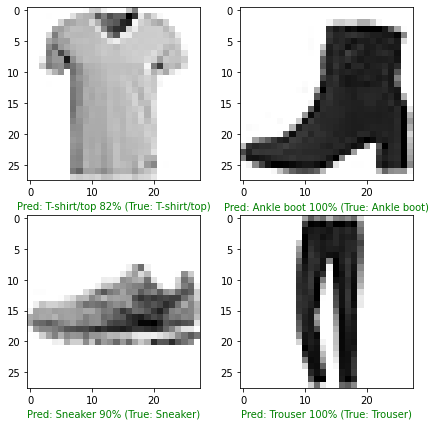

In [ ]:
# Display images and predictions
plot_random_images(model=model_1,
                   images=test_images,
                   true_labels=test_labels,
                   classes=class_names)

## 3. Recreate TensorFlow's softmax activation function in your own code. Make sure it can accept a tensor and return that tensor after having the softmax function applied to it.

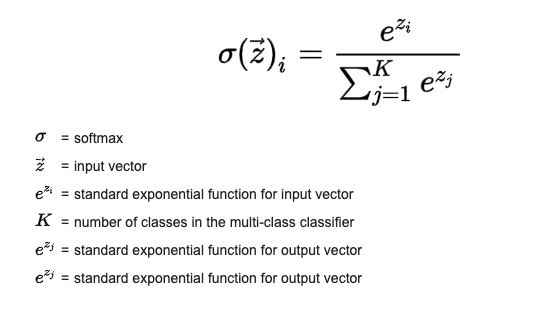

In [ ]:
# Implementing a softmax function
def softmax(x):
  """
  Argument:
  x --> Accepts a tensor of any shape

  Returns:
  --> softmax activations of the input tensor
  """
  x = tf.cast(x, dtype = tf.float32) # to tackle the data type error of int32 / int64

  # Below is the formula
  e_x = tf.math.exp(x - tf.math.reduce_max(x))
  return e_x / tf.math.reduce_sum(e_x, axis = 0)

In [ ]:
# Creating sample tensor
tensor = tf.constant([[1, 2, 3, 6],
                     [2, 4, 5, 6],
                     [3, 8, 7, 6]] )
tensor

<tf.Tensor: shape=(3, 4), dtype=int32, numpy=
array([[1, 2, 3, 6],
       [2, 4, 5, 6],
       [3, 8, 7, 6]], dtype=int32)>

In [ ]:
# Applying the softmax function
softmax(tensor)

<tf.Tensor: shape=(3, 4), dtype=float32, numpy=
array([[0.09003057, 0.00242826, 0.01587624, 0.3333333 ],
       [0.24472849, 0.01794253, 0.11731043, 0.3333333 ],
       [0.66524094, 0.9796292 , 0.8668133 , 0.3333333 ]], dtype=float32)>

### 4. Train a model to get 88%+ accuracy on the fashion MNIST test set. Plot a confusion matrix to see the results after.


In [ ]:
# Getting the MNIST data from the keras dataset
fashion_mnist = tf.keras.datasets.fashion_mnist

# Splitting into train and test
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# Number of classes and class names
num_classes = 10 

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Checking the shapes of the splits
train_images.shape, train_labels.shape, test_images.shape, test_labels.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [ ]:
# Build model
model_2 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape = (28, 28)),
  tf.keras.layers.Dense(64, activation='relu'),
  tf.keras.layers.Dense(32, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])

# Compile model
model_2.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ['accuracy'])

# Fit model
hisory_2 = model_2.fit(train_images, train_labels, epochs=20)

Epoch 1/20
1875/1875 [==============================] - 4s 2ms/step - loss: 1.9105 - accuracy: 0.3925
Epoch 2/20
1875/1875 [==============================] - 4s 2ms/step - loss: 1.3148 - accuracy: 0.4462
Epoch 3/20
1875/1875 [==============================] - 4s 2ms/step - loss: 1.1067 - accuracy: 0.5498
Epoch 4/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.7735 - accuracy: 0.6957
Epoch 5/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6542 - accuracy: 0.7384
Epoch 6/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5962 - accuracy: 0.7580
Epoch 7/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5705 - accuracy: 0.7749
Epoch 8/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5217 - accuracy: 0.8044
Epoch 9/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4948 - accuracy: 0.8159
Epoch 10/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.482

In [ ]:
# Function for the confusion matrix
import itertools
from sklearn.metrics import confusion_matrix

def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10, 10), text_size=15):
  """
  Makes a labelled confusion matrix comparing predictions and ground truth labels.

  If classes is passed, confusion matrix will be labelled, if not, integer class values
  will be used.

  Args:
    y_true: Array of truth labels (must be same shape as y_pred).
    y_pred: Array of predicted labels (must be same shape as y_true).
    classes: Array of class labels (e.g. string form), If `None`, integer labels are used.
    figsize: Size of output figure (default = (10, 10)).
    text_size: Size of output figure text (default=15).

  Returns:
    A labelled confusion matrix plot comparing y_true and y_pred.
  
  Example usage:
    make_confusion_matrix(y_true=test_labels, # ground truth test labels
                          y_pred=y_preds, # predicted labels
                          classes=class_names, # array of class label names
                          figsize=(15, 15),
                          text_size=10
  """
  # Create the confusion matrix
  cm = confusion_matrix(y_true, y_pred)
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
  n_classes = cm.shape[0] # find the number of classes we're dealing with

  # Plot the figure and make it pretty
  fig, ax =plt.subplots(figsize=figsize)
  cax = ax.matshow(cm, cmap=plt.cm.Blues) # colors will represent how 'correct a class is, darker == better
  fig.colorbar(cax)

  # Is there a list of classes?
  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])

  # Label the axes
  ax.set(title="Confusion Matrix",
         xlabel="Predicted label",
         ylabel="True label",
         xticks=np.arange(n_classes), # create enough axis slots for each class
         yticks=np.arange(n_classes),
         xticklabels=labels, # axes will be labeled with class names (if they exist) or ints
         yticklabels=labels)
  
  # Make x-axis labels appear on bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  # Set the threshold for different colors
  threshold = (cm.max() + cm.min()) / 2.

  # Plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i,j]} ({cm_norm[i, j]*100:.1f}%)",
            horizontalalignment="center",
            color="white" if cm[i, j] > threshold else "black",
            size=text_size)

In [ ]:
# Making predictions with our model
pred_probs = model_2.predict(test_images)

# Converting our pred probs to predictions
preds = pred_probs.argmax(axis = 1)

# viewing the first 10 preds
preds[:10]

array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7])

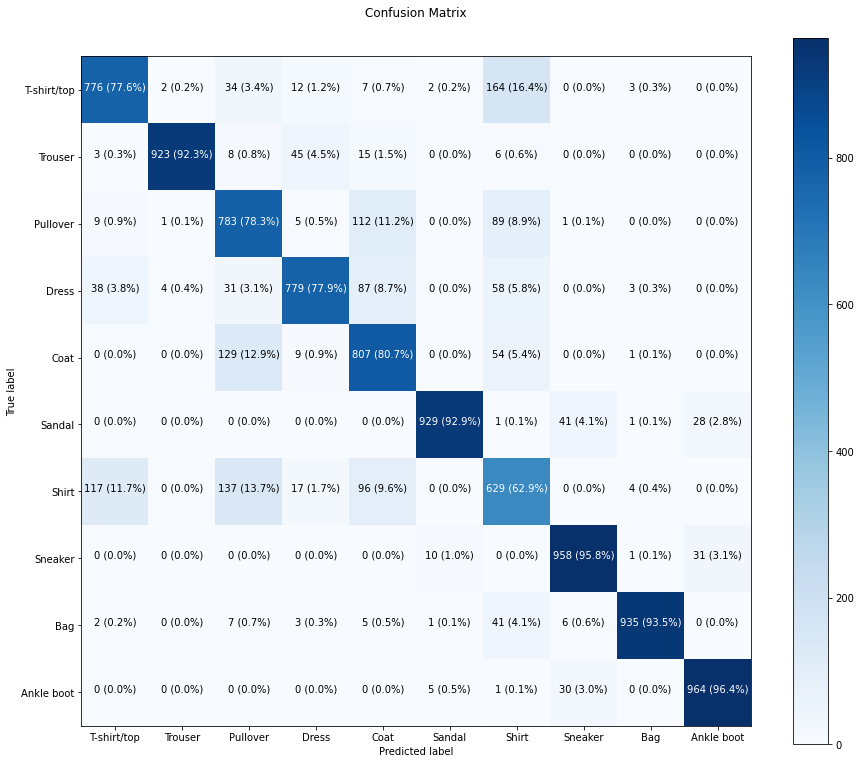

In [ ]:
# Plotting the confusion matrix
make_confusion_matrix(y_true = test_labels,
                      y_pred = preds,
                      classes = class_names,
                      figsize = (15, 13),
                      text_size = 10)

### 5. Make a function to show an image of a certain class of the fashion MNIST dataset and make a prediction on it. For example, plot 3 images of the T-shirt class with their predictions.

In [ ]:
# Make Predictions
preds = model_2.predict(test_images)

In [ ]:
# Function from TensorFlow Tutorials (https://www.tensorflow.org/tutorials/keras/classification#verify_predictions)

def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                       100*np.max(predictions_array),
                                       class_names[true_label]),
             color=color)
  
def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[1]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

def plot_prediction_images():
  num_rows = 5
  num_cols = 3
  num_images = num_rows * num_cols
  plt.figure(figsize = (2*2*num_cols, 2*num_rows))
  for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, preds[i], test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, preds[i], test_labels)
  plt.tight_layout()
  plt.show

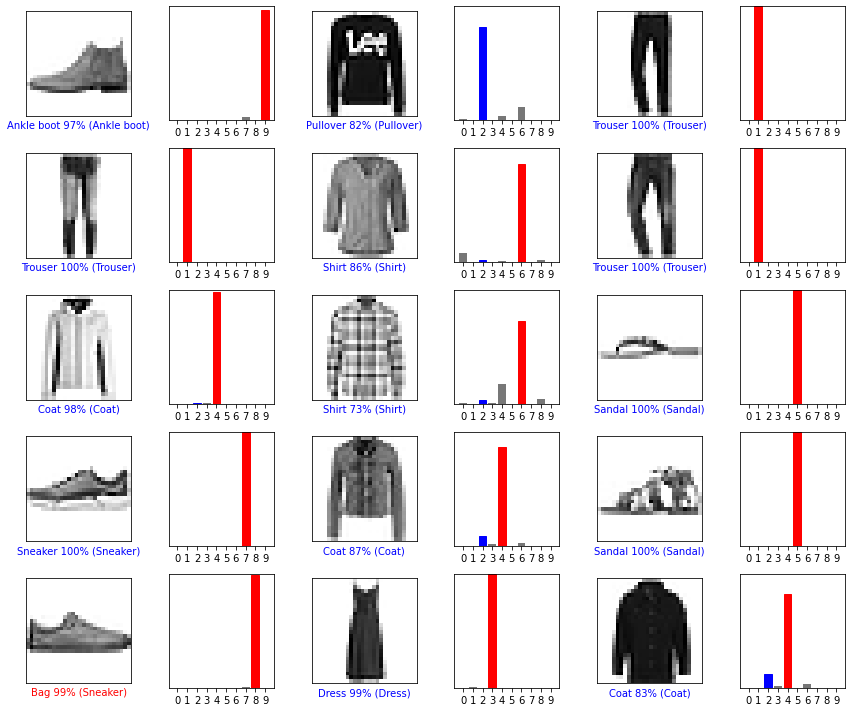

In [ ]:
# use function
plot_prediction_images()